In [1]:
import numpy as np
import tensorflow as tf
import helper

C:\Users\gsund\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
helper.download_dataset()
train_images, train_labels, validation_images, validation_labels, test_images, test_labels = helper.load_data()

Getting MNIST Dataset...
Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Data Extracted.


In [3]:
inputs = tf.placeholder(shape=(None, 784), dtype=tf.float32, name='inputs')
targets = tf.placeholder(shape=(None, 784), dtype=tf.float32, name='targets')

#encoder
hidden_layer1_size = 128
hidden_layer1 = tf.layers.dense(inputs, hidden_layer1_size, activation=tf.nn.relu)

hidden_layer2_size = 32
encoded = tf.layers.dense(hidden_layer1, hidden_layer2_size, activation=tf.nn.relu)

#decoder
hidden_layer3_size = 128
hidden_layer3 = tf.layers.dense(encoded, hidden_layer3_size, activation=tf.nn.relu)

logits = tf.layers.dense(hidden_layer3, 784, activation=None)
decoded = tf.nn.sigmoid(logits, name='outputs')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits)
cost = tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [4]:
#hyper parameters
epochs = 30
batch_size = 256

In [ ]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for ii in range(0, len(train_images), batch_size):
            batch_images = train_images[ii : ii + batch_size]
            feed = {
                inputs : batch_images,
                targets : batch_images
            }
            _cost, _ = sess.run([cost, optimizer], feed_dict=feed)
            
            print("Epoch {:}/{:}....".format(epoch+1, epochs), 
                  "Training loss : {:0.3f}".format(_cost))
    saver.save(sess, "./autoencoder.ckpt")


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

INFO:tensorflow:Restoring parameters from ./autoencoder.ckpt


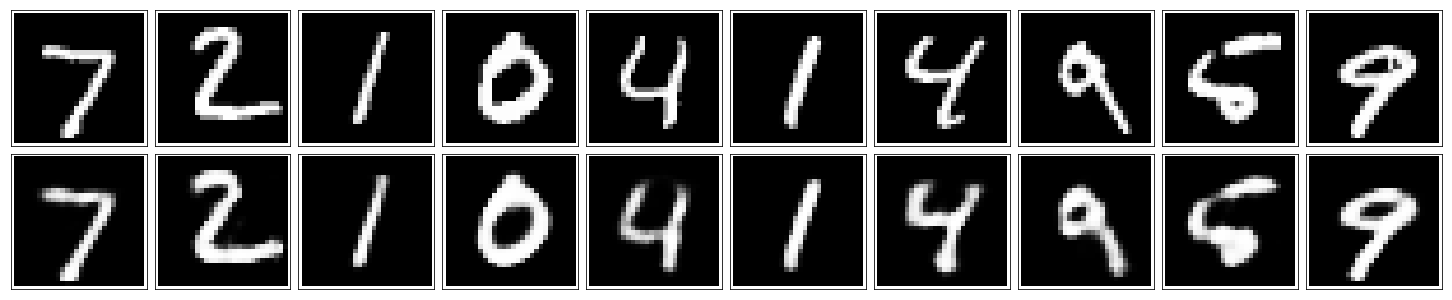

In [7]:
#comparing the original images with the reconstructed images

in_imgs = test_images[:10]
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "./autoencoder.ckpt")
    reconstructed = sess.run(decoded, feed_dict={
        inputs: in_imgs
    })

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20, 4))

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)